# Malaria Parasite Detection - Convolutional Neural Networks
## Daniel Olaleye

## The Data

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/



*Note: This project deals with real image files, NOT numpy arrays,*

*Also, I used google colabs for this project. You will need to tweak some changes re access to file path*

## The Main Goal

In this project, I will be making making use of CNN based DL models as feature extractors toward classifying parasitized and uninfected cells to aid in improved malaria disease screening. I also used already pre-trained transfer learning framework (MobileNet) to improve the model.



## Starter Code

In [1]:
# To use google colab's GPU
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

import tensorflow
from keras.utils.layer_utils import count_params
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# from google.colab import files
# uploaded = files.upload()

#path = "/content/drive/My Drive/Colab Notebooks/Personal Projects/Malaria Cells Identification/Malaria cell_images.zip"

In [0]:
#Depending on your notebook, you might not need this
#Extracting the Zipped folder

# import zipfile
# import io
# # data = zipfile.ZipFile(io.BytesIO(uploaded['Malaria cell_images.zip']), 'r')
# # data.extractall()

# zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/Personal Projects/Malaria Cells Identification/Malaria cell_images.zip", 'r')
# zip_ref.extractall("/tmp")
# zip_ref.close()

In [0]:
train_data_dir = '/content/drive/My Drive/Colab Notebooks/Personal Projects/Malaria Cells Identification/cell_images/train'
test_data_dir = '/content/drive/My Drive/Colab Notebooks/Personal Projects/Malaria Cells Identification/cell_images/test'

In [27]:
os.listdir(train_data_dir)

['uninfected', 'parasitized']

In [28]:
os.listdir(test_data_dir)

['uninfected', 'parasitized']

In [29]:
para_dir = os.listdir(train_data_dir+'/parasitized')[0]
uninfected_dir = os.listdir(train_data_dir+'/uninfected')[0]
para_dir

'C99P60ThinF_IMG_20150918_141129_cell_132.png'

In [30]:
uninfected_dir

'C81P42ThinF_IMG_20150817_120712_cell_73.png'

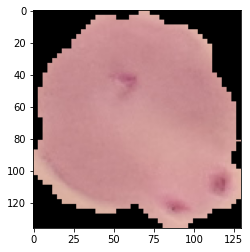

In [31]:
para_cell = train_data_dir+'/parasitized'+'/'+para_dir
para_img = imread(para_cell)
plt.imshow(para_img)

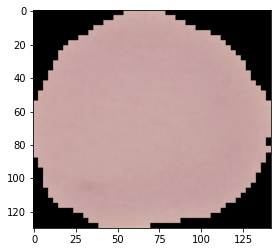

In [32]:
uninfected_cell = train_data_dir+'/uninfected'+'/'+uninfected_dir
uninfected_img = imread(uninfected_cell)
plt.imshow(uninfected_img)

In [33]:
len(os.listdir(train_data_dir+'/parasitized'))

12481

In [34]:
len(os.listdir(train_data_dir+'/uninfected'))

12480

In [35]:
uninfected_img.shape

(130, 142, 3)

In [36]:
para_img.shape

(136, 130, 3)

## Preparing the Data for the Model

We will be using some built in functions in Keras to process the data, generate a flow of batched from a directory, and manipulate images.

### In a bid to make the data more robust, we will rotate, resize, and scale to different images that the dataset doesn't have. The **ImageDataGenerator** will do this automatically.


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

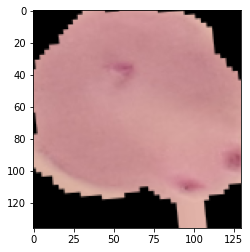

In [39]:
plt.imshow(image_gen.random_transform(para_img))

### Generate manipulated images from a directory

In [40]:
image_gen.flow_from_directory(train_data_dir)

Found 24959 images belonging to 2 classes.


In [0]:
image_gen.flow_from_directory(test_data_dir)

Found 2601 images belonging to 2 classes.


## Creating the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D

In [0]:
image_shape = (130,130,3)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

### Early Stopping

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Training the Model

In [0]:
batch_size = 32

train_image_gen = image_gen.flow_from_directory(train_data_dir,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24959 images belonging to 2 classes.


In [0]:
test_image_gen = image_gen.flow_from_directory(test_data_dir,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=False)

Found 2601 images belonging to 2 classes.


In [0]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# results = model.fit_generator(train_image_gen,epochs=20,
#                               validation_data=test_image_gen,
#                              callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
780/780 [==============================] - 22286s 29s/step - loss: 0.3556 - accuracy: 0.8563 - val_loss: 0.1866 - val_accuracy: 0.9412
Epoch 2/20
780/780 [==============================] - 167s 214ms/step - loss: 0.1793 - accuracy: 0.9441 - val_loss: 0.1684 - val_accuracy: 0.9469
Epoch 3/20
780/780 [==============================] - 167s 215ms/step - loss: 0.1691 - accuracy: 0.9486 - val_loss: 0.1692 - val_accuracy: 0.9431
Epoch 4/20
780/780 [==============================] - 167s 214ms/step - loss: 0.1633 - accuracy: 0.9487 - val_loss: 0.1805 - val_accuracy: 0.9404


In [0]:
# To save the model
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

## Evaluating the Model

In [0]:
losses = pd.DataFrame(model.history.history)

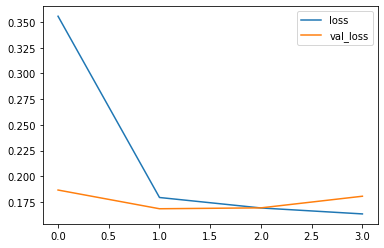

In [0]:
losses[['loss','val_loss']].plot()

In [0]:
model.metrics_names

['loss', 'accuracy']

In [0]:
model.evaluate(test_image_gen)

82/82 [==============================] - 14s 166ms/step - loss: 0.1915 - accuracy: 0.9354


[0.1915120631456375, 0.9354094862937927]

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
pred_probabilities = model.predict(test_image_gen)

In [0]:
pred_probabilities

array([[0.02554434],
       [0.00628035],
       [0.00592918],
       ...,
       [0.90847456],
       [0.9129776 ],
       [0.79499024]], dtype=float32)

In [0]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
predictions = pred_probabilities > 0.5

In [0]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1301
           1       0.91      0.97      0.94      1300

    accuracy                           0.94      2601
   macro avg       0.94      0.94      0.94      2601
weighted avg       0.94      0.94      0.94      2601



In [0]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1171,  130],
       [  35, 1265]])

In [0]:
para_cell

'/content/drive/My Drive/Colab Notebooks/Personal Projects/Malaria Cells Identification/cell_images/train/parasitized/C99P60ThinF_IMG_20150918_141129_cell_132.png'

In [0]:
my_image = image.load_img(para_cell, target_size=image_shape)

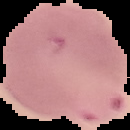

In [0]:
my_image

In [0]:
my_image = image.img_to_array(my_image)

In [0]:
type(my_image)

numpy.ndarray

In [0]:
my_image.shape

(130, 130, 3)

In [0]:
my_image = np.expand_dims(my_image, axis=0)
my_image.shape

(1, 130, 130, 3)

In [0]:
model.predict(my_image)

array([[0.0065355]], dtype=float32)

In [0]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## Fine-tune on MobileNet Framework

###Image preparation

In [0]:
train_path = '/content/drive/My Drive/Colab Notebooks/Personal Projects/Malaria Cells Identification/cell_images/train'
test_path = '/content/drive/My Drive/Colab Notebooks/Personal Projects/Malaria Cells Identification/cell_images/test'

In [47]:
train_batches = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(130,130), batch_size=16)
test_batches = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(130,130), batch_size=16, shuffle=False)

Found 24959 images belonging to 2 classes.
Found 2601 images belonging to 2 classes.


In [0]:
assert train_batches.n == 24959
assert test_batches.n == 2601
assert train_batches.num_classes == test_batches.num_classes == 2

### Modify Model

In [49]:
mobile = tensorflow.keras.applications.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [50]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [0]:
assert count_params(mobile.non_trainable_weights) == 21888
assert count_params(mobile.trainable_weights) == 4231976

In [0]:
x = mobile.layers[-6].output
predictions = Dense(2, activation='softmax')(x)

In [0]:
model = Model(inputs=mobile.input, outputs=predictions)

In [58]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [0]:
assert count_params(model.non_trainable_weights) == 21888
assert count_params(model.trainable_weights) == 3209026

In [0]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [61]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [0]:
assert count_params(model.non_trainable_weights) == 1365184
assert count_params(model.trainable_weights) == 1865730

### Train the Model

In [0]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [64]:
model.fit_generator(generator=train_batches, epochs=20,
                    validation_data=test_batches,
                    callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 9238s 6s/step - loss: 0.1887 - accuracy: 0.9325 - val_loss: 0.1358 - val_accuracy: 0.9535
Epoch 2/20
1560/1560 [==============================] - 93s 59ms/step - loss: 0.1086 - accuracy: 0.9606 - val_loss: 0.1920 - val_accuracy: 0.9331
Epoch 3/20
1560/1560 [==============================] - 92s 59ms/step - loss: 0.0761 - accuracy: 0.9741 - val_loss: 0.1363 - val_accuracy: 0.9589
Epoch 4/20
1560/1560 [==============================] - 93s 60ms/step - loss: 0.0619 - accuracy: 0.9785 - val_loss: 0.1302 - val_accuracy: 0.9562
Epoch 5/20
1560/1560 [==============================] - 92s 59ms/step - loss: 0.0423 - accuracy: 0.9854 - val_loss: 0.1711 - val_accuracy: 0.9454
Epoch 6/20
1560/1560 [==============================] - 93s 59ms/step - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.1653 - val_accuracy: 0.9539
Epoch 7/20
1560/1560 [==========================

In [0]:
from tensorflow.keras.models import load_model
model.save('mobileNet_malaria_detector.h5')

In [0]:
assert model.history.history.get('accuracy')[-1] > 0.95

In [0]:
losses = pd.DataFrame(model.history.history)

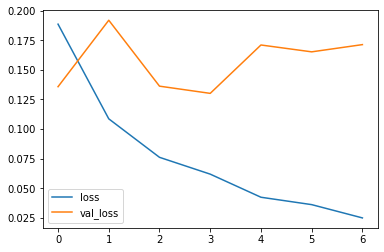

In [68]:
losses[['loss','val_loss']].plot()

In [69]:
model.metrics_names

['loss', 'accuracy']

In [70]:
model.evaluate(test_batches)

163/163 [==============================] - 7s 41ms/step - loss: 0.1714 - accuracy: 0.9616


[0.1713702231645584, 0.9615532755851746]

In [88]:
predictions = model.predict_generator(test_batches)

predictions

array([[1.0000000e+00, 5.1327333e-09],
       [1.0000000e+00, 1.2963328e-10],
       [9.9999988e-01, 1.3973421e-07],
       ...,
       [9.9431469e-05, 9.9990058e-01],
       [4.8130678e-06, 9.9999523e-01],
       [2.4996677e-03, 9.9750036e-01]], dtype=float32)

In [159]:
predictions.shape

(2601, 2)

In [201]:
pred = list(zip(*predictions))[1]
pred = np.array(pred) > 0.5

pred

array([False, False, False, ...,  True,  True,  True])

In [203]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_batches.classes,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1301
           1       0.95      0.97      0.96      1300

    accuracy                           0.96      2601
   macro avg       0.96      0.96      0.96      2601
weighted avg       0.96      0.96      0.96      2601



In [204]:
confusion_matrix(test_batches.classes, pred)

array([[1237,   64],
       [  36, 1264]])